# Classificateurs à arbres de décision : tutoriel sur les forêts aléatoires et les jeux de données bruitées

**Carnet 3 de 3**

Nous verrons dans ce tutoriel comment les classificateurs à forêt aléatoire peuvent améliorer les prédictions face à des jeux de données bruitées alors que de simples modèles d’apprentissage-machine, comme celui de régression linéaire, ne sont pas à la hauteur. Comme jeu de données bruitées, nous utiliserons le jeu de données épurées dont nous nous sommes servis pour le tout premier tutoriel sur la préparation de données à des fins d’apprentissage-machine.

Vous découvrirez dans le **Carnet 3 : forêts aléatoires et jeux de données bruitées** en quoi les classificateurs à forêt aléatoire surpassent les classificateurs par régression linéaire en présence de jeux de données bruitées. Une forêt aléatoire est en fait une méthode de prévision d’ensemble qui établit la moyenne des prédictions faites par plusieurs arbres de décision pour aboutir à des solutions généralisées plus robustes.

Nous utiliserons le jeu de données épurées du tutoriel sur la régression linéaire. Il a fallu pour générer ce jeu de données corriger, via divers postulats, certaines anomalies, notamment des valeurs manquantes ou erronées et des points de données inhabituels qui ne suivaient pas le modèle global. Ces anomalies introduisaient du bruit parmi les données. Le bruit présent dans ce jeu de données est aussi dû à sa taille restreinte, typique des applications d’apprentissage-machine.  
Corriger ou épurer les données a sans doute générer des données de sortie plus « justes » du point de vue statistique mais l’altération de ces donnée a aussi pu avoir une incidence considérable sur la représentation du phénomène réel associé à ces données. Plus votre modèle de données vous éloigne du phénomène réel, plus grand devient l’écart éthique car votre jeu de données contient dorénavant des biais.

Vous avez appris dans le premier tutoriel comment le modèle de régression linéaire parvient à formuler des prédictions à partir de nouvelles données d’entrée, essentiellement en traçant la ligne optimale de correspondance avec l’ensemble des données d’entrée utilisées pour l’entrainement. La régression linéaire est une technique répandue et intuitive de modélisation de liens entre des variables. Toutefois, ses postulats de linéarité s’appliquent rarement aux jeux de données issues du monde réel car ces données sont désordonnées, tous comme les points de données liés au phénomène. Ces jeux de données comportent des variations aléatoires, des erreurs, des anomalies ou des modèles non linéaires complexes. Tout cela génère du « bruit » au sein des données, bruit qui aura une incidence sur l’exactitude des prédictions faites par l’algorithme d’apprentissage-machine. L’algorithmes tentera d’identifier un « signal » parmi le bruit pour orienter son modèle de prédiction, en utilisant des informations liées à une ou plusieurs variables indépendantes telles que temps, espace, fréquence, etc. Le modèle de régression linéaire est trop simpliste pour faire des prédictions justes lorsqu’il est confronté à des données bruitées qui brouille le signal. Le modèle finit par surajuster le bruit et ne peut donc pas, face à de nouvelles données, appliquer avec précision ce qu’il a appris avec les données d’entrainement.

Au terme de ce tutoriel, vous devriez comprendre comme une forêt aléatoire peut gérer le hasard et obtenir une moyenne pour surmonter certaines problématiques, notamment le bruit qui affecte les classificateurs à régression linéaire. Les forêts aléatoires améliorent les résultats prédictifs face à des jeux de données complexes. 

Nous avons d’ores et déjà téléchargé les jeux de données que trouverez dans le référentiel du tutoriel. 


# Les objectifs d'apprentissage
Durée moyenne d’exécution : 30 minutes

À la fin de ce tutoriel, vous devriez être en mesure :
* D’épurer vos données et de décrire en quoi cela est important pour l’apprentissage-machine. 
* De combler les données manquantes, si nécessaire.
* De visualiser et d’analyser les données pour vérifier qu’elles respectent les meilleures pratiques de gestion des données de recherche. 
* De générer un classificateur à forêt aléatoire.
* D’utiliser le classificateur à forêt aléatoire pour faire des prédictions.
* D’analyser les caractéristiques pour améliorer le modèle.


## Ce dont vous aurez besoin pour compléter le tutoriel

* Consultez le [document d'introduction](https://uottawa-it-research-teaching.github.io/machinelearning/) pour connaître les exigences générales et le fonctionnement des carnets Jupyter.
* Nous aurons aussi besoin de Pandas pour faciliter la gestion des données. C’est un outil Python très puissant, capable de lire les fichiers CSV et Excel. Il offre aussi d’excellentes capacités de manipulation de données, ce qui est très utile pour l’épuration des données.
* Nous utiliserons scikit-learn comme trousse d’apprentissage-machine. 
* numpy
* seaborn
* matplotlib
* requests
* ipywidgets
* Les fichiers de données normalement associés au présent carnet.


## Les meilleures pratiques en termes de gestion des données de recherche (GDR)

Une bonne manipulation des données destinées à l’apprentissage-machine commence par une gestion efficace des données de recherche (GDR). 
Comme vous l’avez fait dans les tutoriels précédents, n’oubliez pas :
* D’ENREGISTREZ VOS DONNÉES BRUTES DANS LEUR FORMAT ORIGINAL
* DE SAUVEGARDEZ VOS DONNÉES (règle du 3-2-1)

Nous poursuivrons la même démarche dans le Carnet 2 sur les forêts aléatoires  

DÉCRIVEZ VOS DONNÉES
* Adaptées aux machines : décrivez vos données en fonction d’une norme de métadonnées de découverte.
* Conviviales : décrivez vos variables afin que vos collègues comprennent ce que vous voulez dire. Des données non associées à des métadonnées de qualité ne sont d’aucune utilité. Assignez des noms clairs à vos variables.
* Ne laissez pas de cellules vides – utilisez des valeurs numériques nettement hors des plages pour définir les données manquantes (p. ex., « 99999 ») ou non applicables (p. ex., « 88888 ») et décrivez-les dans votre glossaire de données.
* Convertissez vos données en formats ouverts non exclusifs.
* Nommez vos données de façon claire à l’aide de noms de fichiers utilisant des métadonnées de base.

In [1]:
# Vous devrez peut-être installer les bibliothèques selon le lieu d’exécution du code. 
# Vous pouvez vérifier l’installation des bibliothèques en exécutant !pip List dans une cellule.
# !pip install sklearn numpy pandas seaborn matplotlib requests ipywidgets

In [2]:
import warnings;
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score
%matplotlib inline

Vous vous souviendrez que nous avions dû, dans le tutoriel sur la préparation des données aux fins d’apprentissage-machine, formuler plusieurs postulats quant aux erreurs nées du processus de collecte des données dans le but de combler les données manquantes. Nous avions ainsi « supposé » ou émis une hypothèse raisonnée quant aux valeurs des informations manquantes et la relation entre les points de données. Cette intervention humaine au regard des données a contribué au fonctionnement du modèle de régression linéaire et nous a fourni des données de sortie qui semblaient pouvoir prédire les futurs modèles de circulation de vélos selon les conditions météorologiques et en fonction des anciens modèles de circulation décrits par les données.

Mais un modèle prédictif plus précis ne se baserait pas sur des hypothèses éclairées alors qu’il existe d’autres variables susceptibles d’enrichir le jeu de données.

Le jeu de données épurées « data2020 » utilisé pour le tutoriel sur la régression linéaire a été enrichi pour le présent tutoriel afin d’y intégrer des données complémentaires provenant de sources additionnelles. Il s’agit de sources de données libres liées à l’historique des statistiques météorologiques d’Environnement et Changement climatique Canada.   



[Durée du jour (Hours of Daylight)](https://www.worlddata.info/america/canada/sunset.php)<br>
[Index UV (UV Index)](https://ottawa.weatherstats.ca/metrics/forecast_uv.html)<br>
[Humidité relative (Relative humidity)](https://ottawa.weatherstats.ca/metrics/relative_humidity.html)<br>

Conformément aux meilleures pratiques de gestion des données de recherche, nous avons assigné des noms clairs à ces variables dans notre jeu de données combinées : « hours of daylight (hrs) », « UV Index », « holiday », « weekday », « humidity ». Nous avons aussi converti le dossier en format ouvert « .csv ».  


####Épurez vos données

Assurez-vous d’avoir sous la main le fichier « data/MLTS_20240530_DTRF_DataBikeAndWeather2020_1.0.csv » qui accompagne normalement ce carnet. En cas contraire, vous pouvez le télécharger via le lien intégré au [Tutoriel sur les arbres de décision](https://github.com/uOttawa-IT-Research-teaching/DecisionTrees).

Tout comme pour l’épuration des données faite dans le premier tutorial sur l’apprentissage-machine, nous utiliserons la bibliothèque Pandas pour épurer nos données.

Nous avons procédé à une épuration et une analyse détaillée du jeu de données dans le Carnet 1 sur les arbres de décision. Nous vous recommandons de procéder à une analyse exhaustive du jeu de données, conformément au tutoriel sur la régression linéaire. Nous nous contenterons ici d’un aperçu superficiel pour vérifier l’intégrité des données avec lesquelles nous travaillerons.

In [3]:
sns.set_palette("rainbow")
df = pd.read_csv('./data/MLTS_20240530_DTRF_DataBikeAndWeather2020_1.0.csv')

Ce jeu de données respecte aussi les meilleures pratiques de gestion des données de recherche en nommant clairement les variables de chaque colonne. La structure de ce jeu de données reposes sur des données météorologiques et du calendrier usuelles. Comprendre la nature de ces valeurs ne requiert donc aucune connaissance ou expertise spécifique. Même si nous n’avons pas colligé nous-même ces données en mesurant des centaines de points de données météorologiques ou du calendrier, nous pouvons les réutiliser facilement. Comme nous ne voulons pour l’instant qu’un bref aperçu des données, nous pouvons nous contenter d’examiner seulement les cinq premières lignes de données.

In [4]:
df.head(5)

,prefRoute,Max Temp (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),hours of daylight (hrs),UV Index,holiday,weekday,humidity
0,ADAWE,1.1,0.0,0.0,15,26.0,35,9.2,1.2,1,3,0.8
1,LMET,4.4,0.0,0.0,15,20.0,41,9.2,1.2,0,4,0.8
2,LMET,4.7,0.0,0.0,6,22.2,45,9.2,1.2,0,5,0.7
3,LMET,1.4,0.0,1.8,4,22.2,45,9.2,1.2,0,6,0.4
4,ADAWE,-3.0,0.0,0.0,6,28.0,37,9.2,1.2,0,7,0.6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   prefRoute                  365 non-null    object 
 1   Max Temp (°C)              365 non-null    float64
 2   Total Rain (mm)            365 non-null    float64
 3   Total Snow (cm)            365 non-null    float64
 4   Snow on Grnd (cm)          365 non-null    int64  
 5   Dir of Max Gust (10s deg)  365 non-null    float64
 6   Spd of Max Gust (km/h)     365 non-null    int64  
 7   hours of daylight (hrs)    365 non-null    float64
 8   UV Index                   365 non-null    float64
 9   holiday                    365 non-null    int64  
 10  weekday                    365 non-null    int64  
 11  humidity                   365 non-null    float64
dtypes: float64(7), int64(4), object(1)
memory usage: 34.3+ KB


La documentation limpide des variables, fidèle au processus de collecte de données, nous aide à réutiliser les données ! Selon le récapitulatif, ces colonnes illustrent divers aspects des différentes routes sur lesquelles les données ont été recueillies.
Les valeurs non nulles correspondent au nombre de jours au cours desquels le matériel a enregistré un « décompte des déplacements en vélo (total des deux directions sauf indication contraire) ».

* Les valeurs *float64* réfèrent à la double précision à virgule flottante sur 64 bits, signifiant la capacité de gérer de très grands ou très petits nombres.
* Les valeurs *int64* indiquent que la variable comporte des nombres entiers.
* Les valeurs *object* indiquent que la variable contient des données catégorielles ou textuelles plutôt que numériques.

Vous remarquerez que nous avons 365 entrées (une pour chaque jour de l’année) et 365 valeurs non nulles pour les mesures, donc aucune donnée manquante ! Les données utilisées pour les mesures sont toutes numériques et du même type (float64 et int64). Cela est crucial puisque l’exécution de fonctions mathématiques ne peut se faire qu’à partir de données numériques. Nous construirons le modèle à partir de données numériques qui sont en fait les caractéristiques ou les mesures prises. La variable  prefRoute représente les groupes ou classes que nous tentons de prédire. Elle ne fait donc pas l’objet de calculs à proprement parler.

Dans notre cas, nous avons un compteur qui dénombre des vélos. Aucune expertise requise! Alors procédons au traçage de données.


In [6]:
#df.columns
df.groupby('prefRoute').size()

prefRoute
ADAWE    180
ALEX       5
COBY      19
CRTZ      39
LMET      93
OBVW       2
OGLD       2
ORPY      25
dtype: int64

Examinons maintenant les données. Notre jeu de données de 365 lignes n'est pas réparti également entre les différentes routes de vélos ce qui signifie que les données ne sont pas équilibrées. Il y a beaucoup plus de données concernant la route ADAWE que pour les autres.  Cela contraste fortement avec le jeu de données sur les iris utilisé dans le carnet 2 dont la répartition était nettement plus uniforme, suivant une courbe statistique. Et alors ? Bon nombre de phénomènes survenant dans le monde affichent ce type de distribution inégale. Mais certains modèles dont celui de régression linéaire, ne sont pas suffisamment sophistiqués pour gérer les données au plus petit bout de la courbe (les valeurs aberrantes) et ce, même si ces données sont pertinentes quant aux résultats prédictifs. Nous voulons connaitre les modèles météorologiques sur toutes les routes cyclistes et non pas seulement sur les routes les plus achalandées ! Dans pareille situation, le modèle à forêt aléatoire peut être beaucoup plus inclusif. 
Nous examinerons maintenant les tracés de paires pour mieux connaître la distribution des points de données et les liens entre les données.

L’application Pandas offre plusieurs fonctions utiles pour l’*exploration des données*. La fonction « pairplot() » génère une visualisation Pairplot en traçant un graphique des points de données pour déterminer la relation entre ces points, à savoir continue ou catégorique. Cette visualisation exploratoire des données nous permet d’identifier l’ensemble optimal de caractéristiques favorisant la formation de grappes distinctes au sein du modèle d’arbre décisionnel et, par extension, du plus grand modèle à forêt aléatoire. Il est avantageux de procéder à une analyse « pairplot » pour nous aider à comprendre encore mieux les caractéristiques et améliorer la validation de nos résultats.

Nous diviserons le tracé de paires en trois groupes de variables caractéristiques, notamment pour faciliter la lecture du carnet. Nous optons dans les trois groupes pour des tracés de couleur en fonction des valeurs par prefRoute individuelle. Nous retrouverons dans le premier groupe les caractéristiques suivantes : Max Temp (°C), Total Rain (mm), Total Snow (cm) et Snow on Grnd (cm).

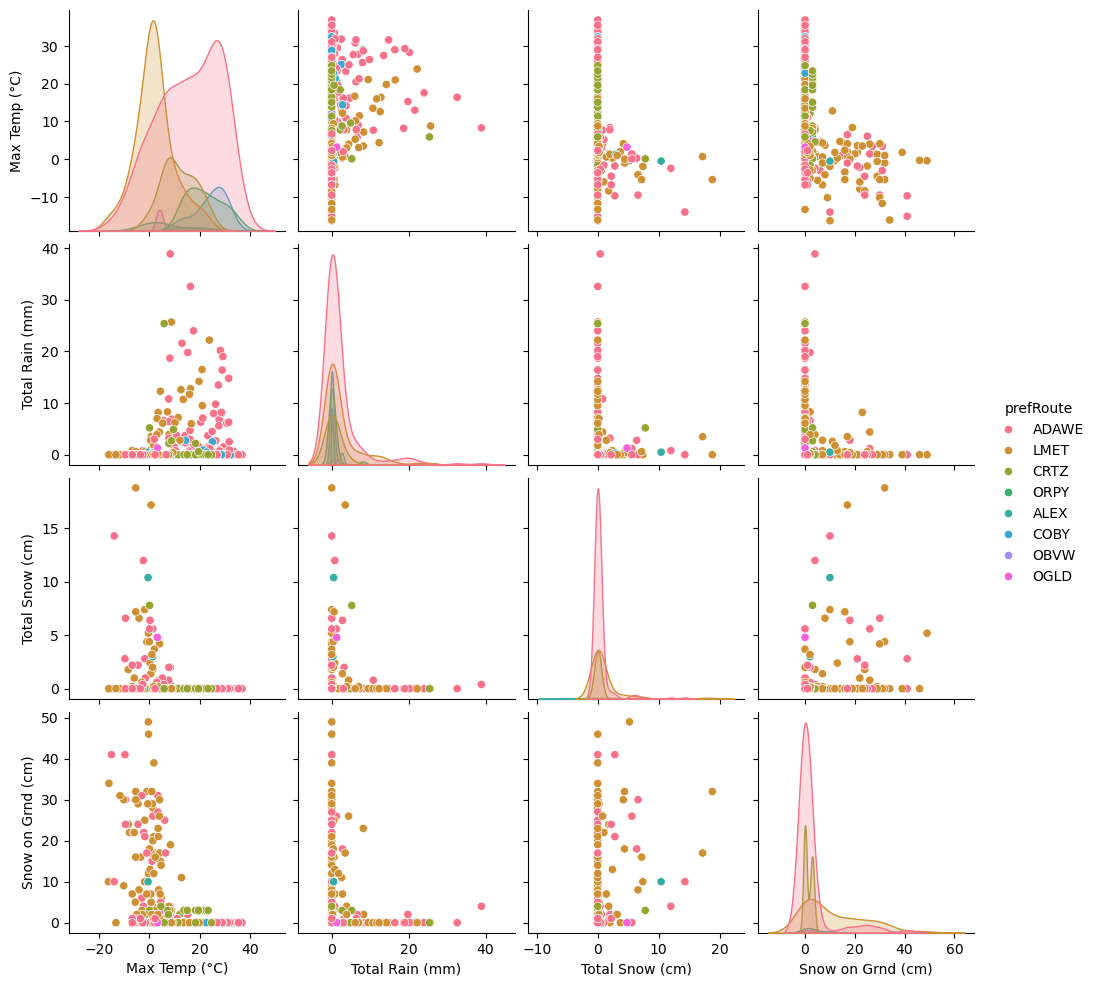

In [7]:
sns.pairplot(df,hue='prefRoute', vars=['Max Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)'])
#sns.countplot(x = 'prefRoute', data = df)

Nous retrouverons dans le deuxième groupe les caractéristiques suivantes : Dir of Max Gust (10s deg), Spd of Max Gust (km/h), hours of daylight (hrs). Faut-il rappeler que nous générons de tracés de couleur en fonction des valeurs de chaque prefRoute.

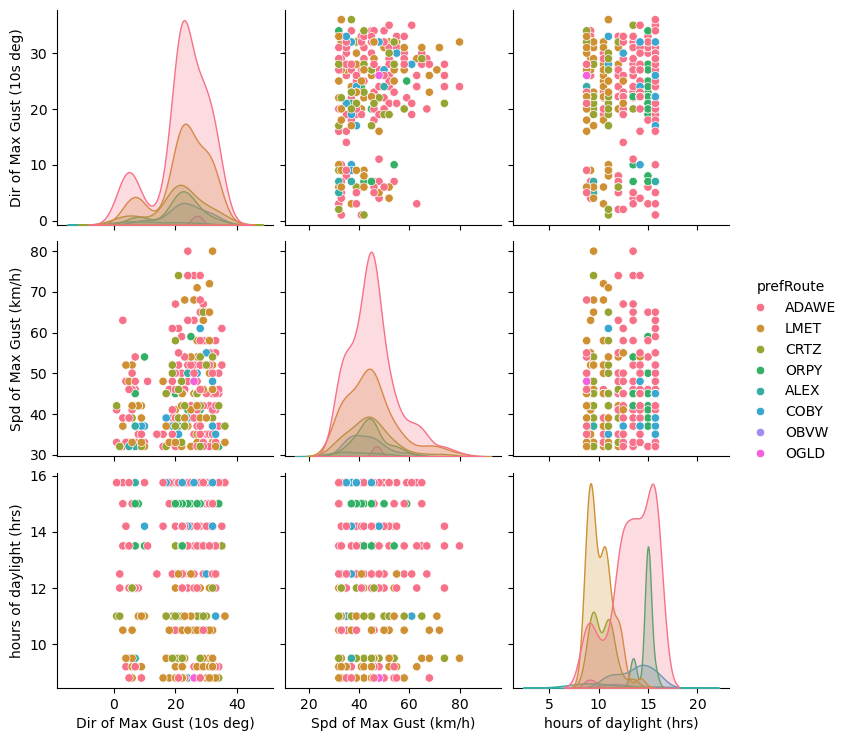

In [8]:
sns.pairplot(df,hue='prefRoute', vars=['Dir of Max Gust (10s deg)', 'Spd of Max Gust (km/h)', 'hours of daylight (hrs)'])

Nous retrouverons dans le troisième groupe les caractéristiques suivantes : UV Index, holiday, weekday, humidity. Faut-il rappeler que nous générons de tracés de couleur en fonction des valeurs de chaque prefRoute.

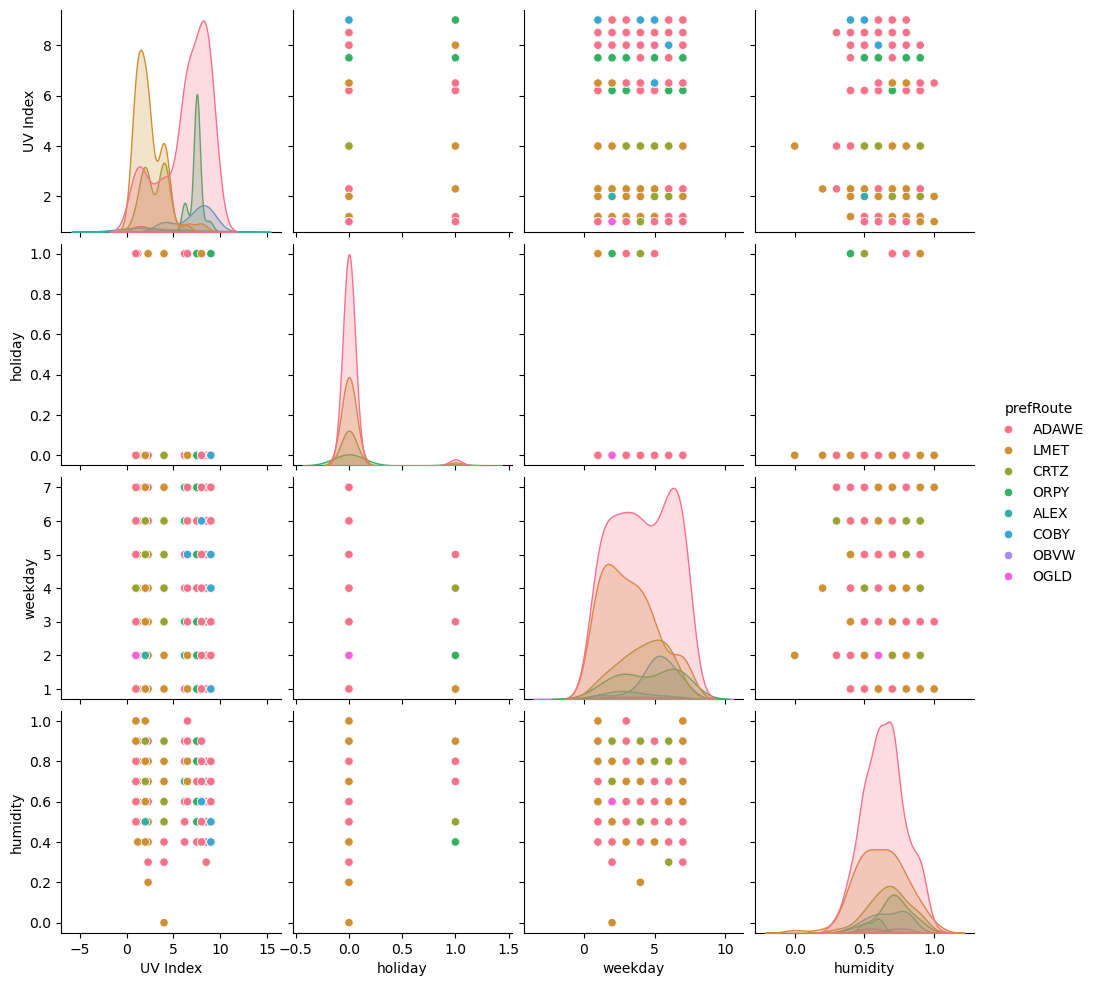

In [9]:
sns.pairplot(df,hue='prefRoute', vars=['UV Index','holiday', 'weekday', 'humidity'])


Tel que noté dans les tutoriels du Carnet 1 sur les arbres de décision et du Carnet 2 sur les forêts aléatoires, nous pouvons mieux visualiser quelles propriétés météorologiques et du calendrier permettent de distinguer les différentes routes de vélos de notre jeu de données en analysant dans les tracés les résultats générés par les fonctions de distribution des probabilités. Sachant que le jeu de données est fortement biaisé en faveur de la route ADAWE, nous pouvons remarquer que les variables liées à l’humidité, le jour de la semaine et s’il s’agit ou non d’un jour de congé, ne permettent pas distinguer les routes les unes des autres. Voici un processus de réflexion qui permet d’analyser ce que nous voyons :  
  * 1 – Observez chaque diagramme de dispersion. Posez-vous la question suivante : puis-je tracer facilement les limites autour de chaque route à l’aide de formes géométriques telles que carrés, rectangles, cercles ou ovales ? 
   * 2 – Dans les cas où cela est difficile, la paire de caractéristiques ne contribue pas de manière   significative à l’exactitude du modèle. Ainsi, comment regrouperiez-vous la route selon les deux valeurs « weekday » et « humidity » ? Il vous faudrait des formes très irrégulières et de forts recoupements. 
  * 3 – Dans les cas où cela est possible, vous pourrez « saisir » la quasi-totalité des points associés à une route donnée tout en minimisant les recoupements. Ces paires de caractéristiques seront d’excellentes candidates pour le modèle. Nous pouvons ainsi saisir assez facilement la quasi-totalité de la route avec des formes géométriques simples en fonction des caractéristiques « Speed of Max Gus » et « Dir of Max Gusts ».
  * 4 – Les cas dans lesquels nous pouvons tracer facilement des limites claires pour mettre en évidence une paire de caractéristiques sont de bons candidats pour améliorer le modèle.
  * 5 - Observez maintenant les courbes de distribution de chaque caractéristique. Pour une caractéristique donnée, les courbes de distribution se recoupent-elles ou semblent-elles mettre en évidence certaines routes ? Ainsi, les courbes des caractéristiques « holiday », « weekday » et « humidity » sont-elles superposées et ne sont donc pas propices à un modèle performant. En voyez-vous d’autres ? 

Nous pouvons, maintenant que nous connaissons les liens entre divers points de données, préparer le classificateur à forêt aléatoire à prédire les futurs résultats en fonction des comportements antérieurs des cyclistes.

### Classificateur à forêt aléatoire

Maintenant que nous connaissons la structure du jeu de données et son potentiel de biais envers la route ADAWE, nous devons déterminer les variables des données d’entrainement et d’essais de notre classificateur à forêt aléatoire.

Pour les données d’entrainement, nous avons :
<br>
   - Variables X (données d’entrée): 'Max Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)','Dir of Max Gust (10s deg)', 'Spd of Max Gust (km/h)', 'hours of daylight (hrs)','UV Index','holiday', 'weekday', 'humidity'<br>
   - Variable Y (donnée de sortie): prefRoute
   
    
Pour les données d’essais, nous avons : <br>
   - Variables X (données d’entrée): 'Max Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)','Dir of Max Gust (10s deg)', 'Spd of Max Gust (km/h)', 'hours of daylight (hrs)','UV Index','holiday', 'weekday', 'humidity'<br>
   - Variable Y (donnée de sortie): prefRoute
   
    
Les propriétés météorologiques et temporelles mesurables sont nos variables X. <br>
La route de préférence est notre variable Y. <br>
Générons-les en extrayant les colonnes pertinentes.

In [10]:
X = df.drop(['prefRoute'],axis=1)
y = df['prefRoute']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=df['prefRoute'], random_state=42)


In [12]:

clf=RandomForestClassifier(n_estimators=10)

Vous avez appris dans le tutoriel du Carnet 2 sur les arbres aléatoires que ces classificateurs comportent en fait plusieurs arbres de décision assignés à différents blocs de données. Le modèle cumule les résultats de manière à formuler des prédictions plus précises. En d’autres termes, la donnée de sortie d’une forêt aléatoire correspond à la classe sélectionnée par le plus haut nombre d’arbres de décision constituant la forêt aléatoire. Le nombre « d’estimateurs » correspond au nombre d’arbres de décision que nous souhaitons que le modèle de forêt aléatoire utilise pour faire des prédictions.
Établissons maintenant notre classificateur à forêt aléatoire en utilisant les variables d’entraînement ci-dessus : x_train et y_train.

Notre classificateur à forêt aléatoire comportera 10 estimateurs. Règle générale, il faut pour déterminer ce nombre commencer relativement petit et augmenter le nombre jusqu’à ce que les paramètres de performance se stabilisent ou atteignent un plateau. Le nombre d’estimateurs sera fonction de la taille et de la complexité du jeu de données. Les jeux de données de grande taille et plus complexes bénéficieront certainement d’un plus grand nombre d’estimateurs.

Il nous reste ensuite à ajuster le modèle en fonction des données d’entrainement. Ici, ajuster signifie entrainer.  



In [13]:
clf.fit(X_train,y_train)


RandomForestClassifier(n_estimators=10)

In [14]:
y_pred=clf.predict(X_test)
print("Accuracy:","{:.3f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.736


Comment l’exactitude des prédictions faites par la forêt aléatoire, à laquelle de nouvelles données d’indice UV, de jours de congé, de jours de la semaine, de taux d’humidité et d’heures de lumière du jour, se compare-t-elle à celle du modèle de régression linéaire ? La division des données entre entrainement et essais se faisant par sélection aléatoire de lignes, et compte tenu du fait que la route ADAWE comporte deux fois plus de points de données que la route qui vient au deuxième rang, le jeu de données peut être considéré biaisé. Il convient néanmoins de noter une amélioration notoire de la précision du modèle, essentiellement imputable à la capacité de la forêt aléatoire à éliminer par filtrage le bruit présent au sein des données.

Mettons le modèle à l’essai en tentant de prédire la route choisie en fonction d’un jeu de données précis. Essayons de prédire quelles sont les probabilités que des cyclistes optent pour une route spécifique dans des circonstances précises selon les mesures que nous choisirons.

In [15]:
# Sélectionner la route d’essai en décommettant la ligne

#preferedRoute_index = clf.predict([[1.1,3.0,10.0,15,26.0,35,9.2,1.2,1,3,0.8]]) #Expect ADAWE
#preferedRoute_index = clf.predict([[-4.1,0,6.6,8,27,35,9.2,1.2,0,1,0.4]]) # Expect LMET
preferedRoute_index = clf.predict([[12.1,0,0,2,20,45,13.5,6.2,0,7,0.7]]) # Expect CRTZ

print(preferedRoute_index)

['CRTZ']


Le cas-type ci-dessus prédit la route dans les circonstances ci-après :  
* la température (Temp) est de 12,1 °C
* la pluie totale (Total Rain) est de 0 mm 
* la neige totale (Total Snow) est de 0 mm
* la neige au sol (Snow on Grnd) est de 2 cm
* la direction des bourrasques maximales (Dir of Max Gust (10s deg)) est de 200 degrés
* la vitesse des bourrasques maximales (Spd of Max Gust) est de  45 km/h 
* les heures de lumière du jour (hours of daylight) sont de 13,5 heures
* l’indice UV (UV Index) est de 6,2
* ce n’est pas un congé civique (holiday)  
* le jour de la semaine (weekday) est un dimanche (7)
* le taux d’humidité (humidity) est de 70 %

Nous pouvons en fonction de ces mesures, émettre une hypothèse quant à la route choisie, soit CRTZ.

La route que vous avez prévue lors de l’essai est-elle la même que celle prédite par le modèle ?   N’oubliez pas que des sous-ensembles aléatoires sont générés. Selon le degré d’exactitude, il y a encore une probabilité (environ 28 %) que le résultat prédit soit erroné. Nous pouvons en faire davantage pour améliorer la performance. 


##### L’importance des caractéristiques
Il a été précisé dans le tutoriel du Carnet 2 sur les forêts aléatoires que les caractéristiques représentent les variables ou attributs utilisés par l’arbre pour faire des prédictions. L’importance des caractéristiques relève de techniques de gradation des caractéristiques en fonction de leur capacité à faire des prédictions finales justes.

Le modèle de prédiction de type forêt aléatoire étant de nature statistique, il est possible d’évaluer l’importance et le poids de chaque propriété ou caractéristique mesurable des routes. Ces caractéristiques sont les suivantes :  Temp (°C), Total Rain (mm), Total Snow (cm), Snow on Grnd (cm), Dir of Max Gust (10s deg), Spd of Max Gust (km/h), hours of daylight (hrs), UV Index, holiday, weekday et humidity. On mesure l’importance des caractéristiques en fonction de la diminution de la précision d’un arbre de décision et de l’absence d’une caractéristique lors de la division. Le rendement (et donc la précision) diminue si l’on omet des caractéristiques plus déterminantes. Ce processus est repris pour tous les arbres de décision (estimateurs) qui constituent la forêt. Une mesure moyenne de la diminution de la précision pour l’ensemble des arbres est alors assignée à chaque caractéristique sous forme « d’importance ».

Voyons de quoi cela a l’air en traçant un diagramme à barres pour chaque caractéristique en fonction de son importance relative.


In [16]:

input_parameters = pd.Series(clf.feature_importances_,index=['Max Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)', 'Dir of Max Gust (10s deg)', 'Spd of Max Gust (km/h)', 'hours of daylight (hrs)', 'UV Index','holiday', 'weekday', 'humidity']).sort_values(ascending=False)
                          
input_parameters.index

Index(['Max Temp (°C)', 'hours of daylight (hrs)', 'weekday', 'UV Index',
       'Dir of Max Gust (10s deg)', 'Total Rain (mm)', 'Snow on Grnd (cm)',
       'Spd of Max Gust (km/h)', 'humidity', 'Total Snow (cm)', 'holiday'],
      dtype='object')

Examinons maintenant les caractéristiques par ordre d’importance.

Text(0, 0.5, 'Input Parameters')

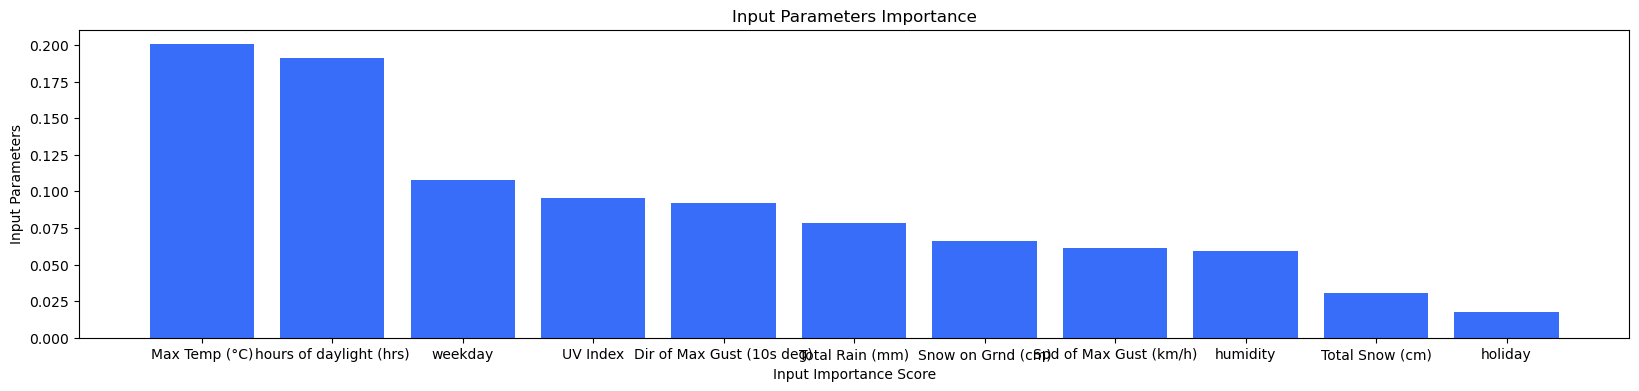

In [17]:
#importer matplotlib.pyplot sous forme plt
plt.rcParams['figure.figsize'] = [20, 4]

plt.bar(input_parameters.index,input_parameters.values)
plt.title('Input Parameters Importance')
plt.xlabel('Input Importance Score')
plt.ylabel('Input Parameters')

Nous remarquons que les variables « Total Snow » et « Holiday » ont nettement moins d’impact que d’autres caractéristiques telles que « Max Temp », « UV Index » ou « Hours of Light ». Établissons maintenant certains paramètres de cette importance. L’importance équivaut à la portée ou influence de chaque caractéristique en matière de prédiction. Elle est notée entre 0 et 1 sur l’axe des x. Plus la valeur numérique est élevée, plus le modèle l’aura utilisée pour faire des divisions ou prendre des décisions et meilleure sera la capacité prédictive du modèle. La somme des importances est de 1.

In [18]:
importances = list(clf.feature_importances_)

# Liste des tuples avec variable et importance 
feature_list = df.columns.drop('prefRoute')
print(feature_list)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Trier l’importance des caractéristiques par ordre décroissant 
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Imprimer les caractéristiques et les importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Index(['Max Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Snow on Grnd (cm)', 'Dir of Max Gust (10s deg)',
       'Spd of Max Gust (km/h)', 'hours of daylight (hrs)', 'UV Index',
       'holiday', 'weekday', 'humidity'],
      dtype='object')
Variable: Max Temp (°C)        Importance: 0.2
Variable: hours of daylight (hrs) Importance: 0.19
Variable: weekday              Importance: 0.11
Variable: UV Index             Importance: 0.1
Variable: Dir of Max Gust (10s deg) Importance: 0.09
Variable: Total Rain (mm)      Importance: 0.08
Variable: Snow on Grnd (cm)    Importance: 0.07
Variable: Spd of Max Gust (km/h) Importance: 0.06
Variable: humidity             Importance: 0.06
Variable: Total Snow (cm)      Importance: 0.03
Variable: holiday              Importance: 0.02


[None, None, None, None, None, None, None, None, None, None, None]

Nous tenterons maintenant d’obtenir le modèle de prédiction à forêt aléatoire le plus exact.

Lors de l’utilisation d’un modèle à forêt aléatoire, nous pouvons décider de supprimer certaines caractéristiques de moindre importance par le biais de critères sélectionnés en fonction de la question posée au modèle : le modèle peut-il prédire le volume de circulation sur une route donnée sous des conditions météorologiques variables ?

En fixant un seuil, nous introduisons un biais au niveau de la prédiction. Le choix de ce seuil devra reposer sur une méthodologie bien documentée. Dans le cas présent, nous fixerons le seuil à 95 % pour bien illustrer le concept, puisque les diagrammes de dispersion ci-dessus démontrent que les caractéristiques omises ont très peu d’incidence sur la qualité de prédiction de la route.

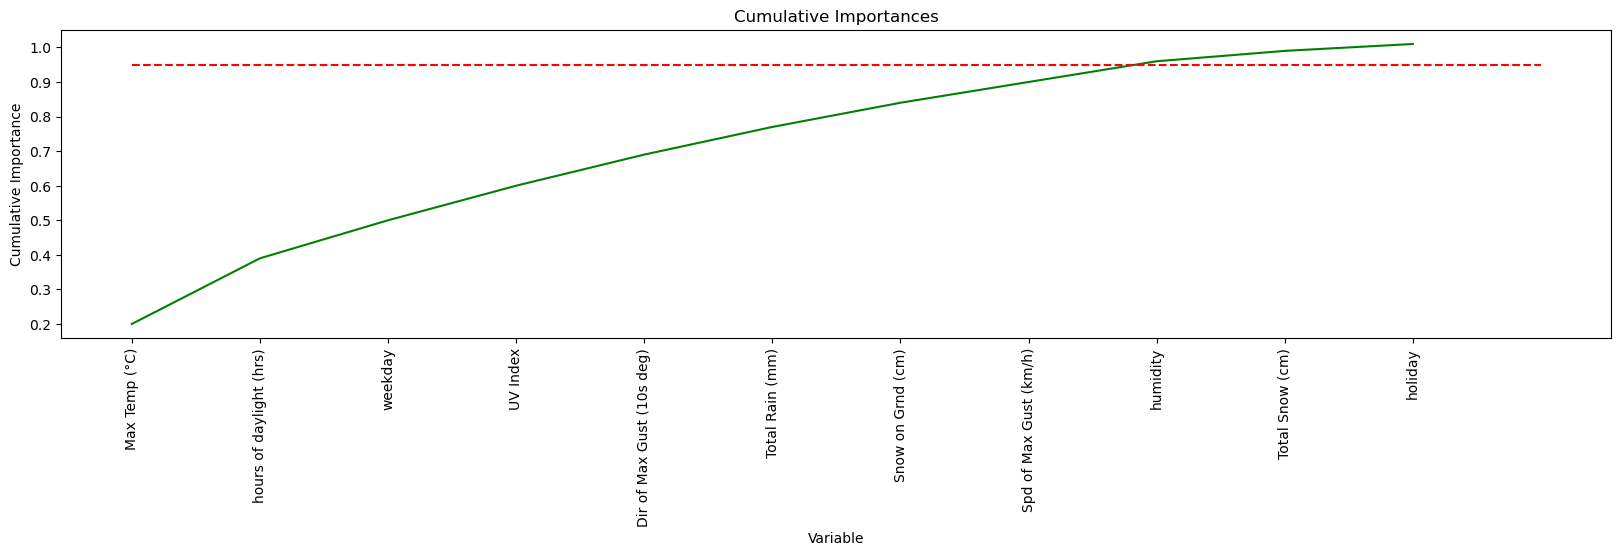

In [19]:
# liste des points x pour le traçage
x_values = list(range(len(importances)))

# Liste des caractéristiques classées par ordre d’importance décroissant
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Importances cumulées
cumulative_importances = np.cumsum(sorted_importances)

# Générer un graphique linéaire
plt.plot(x_values, cumulative_importances, 'g-')

# Tracer un ligne à 95 % de l’importance retenue
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Formater la ligne guide des x et les étiquettes
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Étiquettes et titres des axes
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');


La ligne verte ci-dessus illustre l’impact cumulatif de la caractéristique jusqu’au seuil fixé de 95 % (représenté par la ligne rouge).

Maintenir les caractéristiques dont le poids cumulatif atteint 95 % semble raisonnable si nous pouvons en tirer une amélioration de l’exactitude. Tentons la chose.

In [20]:
# Identifier le nombre de caractéristiques en fonction d’une importance cumulée de 95 % 
# Ajouter 1 car Python est indexé à zéro
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 9


(Nombre de caractéristiques pour une importance de 95 % : 10) <br>
La variable « sorted_features » dans la cellule ci-dessus énumère les caractéristiques par ordre d’importance décroissant.  Nous sélectionnerons les 9 premières qui totalisent 95 % de capacité prédictive.


In [21]:
print()
print(sorted_features[:9])


['Max Temp (°C)', 'hours of daylight (hrs)', 'weekday', 'UV Index', 'Dir of Max Gust (10s deg)', 'Total Rain (mm)', 'Snow on Grnd (cm)', 'Spd of Max Gust (km/h)', 'humidity']


Donc 9 caractéristiques présentent une capacité prédictive cumulative de 95 %. Exécutons à nouveau le modèle en fonction de ces 9 caractéristiques. Pour cela, supprimons les deux dernières colonnes de notre jeu de données, à savoir « Total Snow (cm) » et « holiday ».

In [22]:
# Doit être configuré pour Workshop

X = df.drop(['prefRoute', 'Total Snow (cm)', 'holiday'],axis=1)
y = df['prefRoute']

Utilisons ce jeu de données remanié pour entrainer à nouveau le modèle. Commencez par diviser les données ce jeu en données d’entrainement et données d’essais dans un rapport respectif de 70 % et 30 %.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=df['prefRoute'], random_state=42)


Commençons donc à bâtir le modèle en fonction de ce rapport de 70/30 %.

In [24]:

clf=RandomForestClassifier(n_estimators=20)

In [25]:
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

Effectuez la prédiction à partir du jeu d’essais.

In [26]:
y_pred=clf.predict(X_test)

Vérifie le degré de précision et comparez-le au précédent.

In [27]:
print("Accuracy:","{:.3f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.764


Y a-t-il eu amélioration de l’exactitude de la prédiction après suppression des caractéristiques les moins importantes ?  

Il y aura la plupart du temps une amélioration importante. Dans ce cas-ci, le taux d’exactitude est passé de 0.754 à 0.773, ce qui n’est pas très significatif ! Il nous faudrait abaisser notre seuil d’importance des caractéristiques pour améliorer ces chiffres. Mais cela ferait aussi accroitre le biais de prédiction.
Nos tracés antérieurs nous ont démontré que ce jeu de données est bruité et très déséquilibré. Le jeu de données étant au départ très bruité, nous ne voyons qu’une mince amélioration. Nous pourrions envisager des mesures plus draconiennes comme le rééquilibrage des données ou l’ajout de données supplémentaires. Notre méthodologie devrait alors tenir compte de ces éléments et nous devrions documenter soigneusement le biais potentiel des prédictions.  

Le retrait des caractéristiques de faible importance d’un modèle à forêt aléatoire peut avoir les effets suivants :
* Amélioration du rendement du modèle : la suppression de caractéristiques bruitées, non pertinentes ou trompeuses empêche leur impact négatif sur les arbres de décision individuels. 
* Réduction du surajustement : moins de caractéristiques signifie moins de probabilités de surajustement en raison de modèles parasites. 
* Le retrait de caractéristiques sans importance agit comme une sorte de régulateur. 
  Augmente la vitesse de calcul : la diminution du nombre de caractéristiques exige moins de temps pour entrainer et évaluer les arbres de décision. L’élagage des caractéristiques réduit la complexité et augmente l’efficacité.  
* Amélioration de l’interprétabilité : mettre l’accent sur les caractéristiques les plus importantes facilite l’explication des prédictions et la compréhension des comportements du modèle. Le signal fondamental est préservé. 
* Peut diminuer la variance au sein du modèle : le retrait des caractéristiques superflues peut diminuer la variance entre les arbres de décision et resserrer les prédictions. Mais cela peut aussi causer la suppression de prédicteurs utiles. 
* Perte potentielle d’informations : les caractéristiques de moindre importance peuvent contenir certains signaux utiles. Un retrait trop agressif peut diminuer le rendement du modèle en cas d’interactions significatives. L’impact dépend aussi du motif de faible importance de la caractéristique.  Il peut s’agir de non pertinence ou de redondance. Les caractéristiques redondantes peuvent probablement être supprimées sans avoir trop d’impact sur l’exactitude du modèle. Par contre, les caractéristiques non pertinentes devraient être supprimées pour améliorer la performance de la forêt aléatoire.
 

**Il convient toutefois de noter...**

Dans certaines situations, le retrait des caractéristiques de moindre importance peut diminuer le niveau d’exactitude d’un modèle de forêt aléatoire :
- Caractéristiques de forte corrélation : en présence de deux caractéristiques fortement corrélées, l’une d’entre elles pourrait être considérée de moindre importance, mais son retrait supprimerait aussi un signal important. 
- Jeu de données de petite taille : en présence d’un nombre restreint de données, les cotes d’importance sont moins fiables. Le retrait de caractéristiques jugées non importantes pourrait entrainer la suppression de prédicteurs utiles. 
- Interactions avec d’autres caractéristiques : une caractéristique peut ne pas être prédictive par elle-même mais présenter des interactions susceptibles de contribuer à l’exactitude   du modèle. Son retrait invaliderait ces interactions. 
- Réduction du bruit : une caractéristique de faible signal peut agir comme un filtre antibruit qui améliorera l’exactitude du modèle. Son retrait annulerait l’effet de régularisation. 
- Détournement de données : une caractéristique non liée à la cible peut causer une fuite de signal au niveau-même de la cible. Son retrait met fin à la fuite et contribue ainsi à améliorer l’exactitude du modèle.
- Paramètres d’importance simples : les paramètres d’importance utilisés peuvent ne pas refléter pleinement la contribution d’une caractéristique. La structure de l’arbre est importante. 
- Captage des effets secondaires : une caractéristique de moindre importance peut capter certains effets secondaires ou approximations qui contribuent un tant soit peu à l’exactitude du modèle. Règle générale, si les caractéristiques de moindre importance présentent certaines interactions, redondances ou des effets masqués, le retrait d’un trop grand nombre d’entre elles pourrait dégrader la performance du modèle de forêt aléatoire.  Il faut atteindre un juste équilibre.


**Résumé**<br><br>
Il faut rappeler ici, comme nous l’avons constaté en début de tutoriel, que le jeu de données est fortement favorable à la route ADAWE. Les données relatives à cette route représentent près de 50 % de l’ensemble des données contre 32 % pour la suivante, puis 10 %, etc. Nous avons toutefois pu atteindre un taux d’exactitude de 72 %, ce qui est plutôt bon compte tenu de ces écarts. La prochaine étape consisterait à identifier et rogner toute caractéristique de forte corrélation avec d’autres caractéristiques. Nous avons appris comment le faire dans le Carnet 1 sur les arbres de décision. Il faudrait par la suite obtenir plus de données sur les autres routes ou même envisager de supprimer certaines routes, l’objectif étant une distribution équilibrée des données en fonction des résultats que nous souhaitons prédire.

En résumé, nous avons accompli les tâches suivantes :
- Importer les bibliothèques nécessaires au tutoriel.
- Charger le jeu de données épurées « data2020 » utilisé pour le tutoriel sur la régression linéaire avec ajout de nouvelles caractéristiques : « hours of daylight (hrs) », « UV Index », « holiday », « weekday » et « humidity »
- Vérifier et visualiser le jeu de données à l’aide de fonctions comme « groupby() », head(), pairplot(), etc.
- Diviser le jeu de données en un jeu d’entrainement et un jeu d’essais.
- Créer un exemple de classificateur à arbre de décision.
- Entrainer le classificateur à arbre de décision à l’aide des données d’entrainement.
- Évaluer la capacité du modèle à faire des prédictions à partir de nouvelles données.
- Intégrer au modèle le concept d’importance des caractéristiques afin de supprimer les caractéristiques de moindre importance. Fixer le seuil à 95 % pour illustrer le concept, les diagrammes de dispersion ci-dessus démontrant que les caractéristiques omises ont très peu d’impact sur l’exactitude la prédiction de route.
- Constater qu’un classificateur à forêt aléatoire performe mieux qu’un classificateur à régression linéaire en termes de classification de données.

